In [45]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("AviationData.txt", delimiter="|")

In [3]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,
0,20131208X92103,Accident,ERA14FA068,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,N98BT,CESSNA,310R,No,2,Reciprocating,Part 91: General Aviation,,Personal,,3,,,,IMC,,Preliminary,12/13/2013,
1,20131206X95526,Accident,ERA14FA066,12/06/2013,"Sebring, FL",United States,27.463333,-81.366667,SEF,Sebring Regional Airport,Fatal(1),Destroyed,Helicopter,N1001N,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Part 91: General Aviation,,Positioning,,1,,,,,,Preliminary,12/13/2013,
2,20131205X60841,Accident,ANC14CA010,12/04/2013,"Soldotna, AK",United States,,,,,,,,N88342,BELLANCA,7GCBC,,,,,,,,,,,,,,Preliminary,,
3,20131204X65412,Accident,ERA14CA062,12/03/2013,"Hendersonville, NC",United States,,,,,,,,N581TC,ANDERSON ANDREAS,RANS S-6S,,,,,,,,,,,,,,Preliminary,,
4,20131202X34203,Accident,ERA14LA059,12/02/2013,"Trenton, SC",United States,33.736944,-81.818611,6J6,Edgefield County Airport,Non-Fatal,Substantial,Airplane,N355PT,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,,Part 91: General Aviation,,Personal,,,,1,,,,Preliminary,12/13/2013,


In [4]:
df.columns

Index(['Event Id ', ' Investigation Type ', ' Accident Number ',
       ' Event Date ', ' Location ', ' Country ', ' Latitude ', ' Longitude ',
       ' Airport Code ', ' Airport Name ', ' Injury Severity ',
       ' Aircraft Damage ', ' Aircraft Category ', ' Registration Number ',
       ' Make ', ' Model ', ' Amateur Built ', ' Number of Engines ',
       ' Engine Type ', ' FAR Description ', ' Schedule ',
       ' Purpose of Flight ', ' Air Carrier ', ' Total Fatal Injuries ',
       ' Total Serious Injuries ', ' Total Minor Injuries ',
       ' Total Uninjured ', ' Weather Condition ', ' Broad Phase of Flight ',
       ' Report Status ', ' Publication Date ', ' '],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74428 entries, 0 to 74427
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Event Id                  74428 non-null  object
 1    Investigation Type       74428 non-null  object
 2    Accident Number          74428 non-null  object
 3    Event Date               74428 non-null  object
 4    Location                 74428 non-null  object
 5    Country                  74428 non-null  object
 6    Latitude                 74428 non-null  object
 7    Longitude                74428 non-null  object
 8    Airport Code             74428 non-null  object
 9    Airport Name             74428 non-null  object
 10   Injury Severity          74428 non-null  object
 11   Aircraft Damage          74428 non-null  object
 12   Aircraft Category        74428 non-null  object
 13   Registration Number      74428 non-null  object
 14   Make                 

In [6]:
columns_drop = ['Event Id ', ' Accident Number ', ' Registration Number ', ' Publication Date ']
df.drop(columns = columns_drop, inplace = True)

In [7]:
df.replace("  ", np.NaN, inplace = True)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x).rename(columns=lambda x: x.strip())
df.head()

,Investigation Type,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,
0,Accident,12/08/2013,"Jacksonville, FL",United States,30.319723,-81.514167,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,Airplane,CESSNA,310R,No,2,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,NaN,Preliminary,
1,Accident,12/06/2013,"Sebring, FL",United States,27.463333,-81.366667,SEF,Sebring Regional Airport,Fatal(1),Destroyed,Helicopter,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Part 91: General Aviation,NaN,Positioning,NaN,1,NaN,NaN,NaN,NaN,NaN,Preliminary,
2,Accident,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BELLANCA,7GCBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
3,Accident,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANDERSON ANDREAS,RANS S-6S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,
4,Accident,12/02/2013,"Trenton, SC",United States,33.736944,-81.818611,6J6,Edgefield County Airport,Non-Fatal,Substantial,Airplane,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,1,NaN,NaN,NaN,Preliminary,


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74428 entries, 0 to 74427
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Investigation Type      74428 non-null  object
 1   Event Date              74426 non-null  object
 2   Location                74339 non-null  object
 3   Country                 73917 non-null  object
 4   Latitude                21284 non-null  object
 5   Longitude               21275 non-null  object
 6   Airport Code            41723 non-null  object
 7   Airport Name            44622 non-null  object
 8   Injury Severity         74372 non-null  object
 9   Aircraft Damage         72267 non-null  object
 10  Aircraft Category       13655 non-null  object
 11  Make                    74339 non-null  object
 12  Model                   74307 non-null  object
 13  Amateur Built           73936 non-null  object
 14  Number of Engines       71198 non-null  object
 15  En

In [9]:
#Drop Columns where more than 50% values are null

df.drop(['Latitude', 'Longitude', 'Aircraft Category', 'FAR Description', 'Schedule', 'Air Carrier'], inplace = True, axis = 1)
df.shape

(74428, 22)

In [38]:
df.head()

,Investigation Type,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,,Month,Day,Year
0,Accident,12/08/2013,"Jacksonville, FL",United States,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,CESSNA,310R,No,2,Reciprocating,Personal,3,0,0,0,IMC,NaN,Preliminary,,12,8,2013
1,Accident,12/06/2013,"Sebring, FL",United States,SEF,Sebring Regional Airport,Fatal(1),Destroyed,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Positioning,1,0,0,0,NaN,NaN,Preliminary,,12,6,2013
2,Accident,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,BELLANCA,7GCBC,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,,12,4,2013
3,Accident,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,ANDERSON ANDREAS,RANS S-6S,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,,12,3,2013
4,Accident,12/02/2013,"Trenton, SC",United States,6J6,Edgefield County Airport,Non-Fatal,Substantial,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,NaN,Personal,0,0,1,0,NaN,NaN,Preliminary,,12,2,2013


In [11]:
df.isna().sum()

Investigation Type            0
Event Date                    2
Location                     89
Country                     511
Airport Code              32705
Airport Name              29806
Injury Severity              56
Aircraft Damage            2161
Make                         89
Model                       121
Amateur Built               492
Number of Engines          3230
Engine Type                2721
Purpose of Flight          3010
Total Fatal Injuries      19266
Total Serious Injuries    21077
Total Minor Injuries      20157
Total Uninjured           10088
Weather Condition          1516
Broad Phase of Flight      6071
Report Status                 0
                              0
dtype: int64

In [12]:
#connverting numerical data to int type
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(0).astype("int")
df['Total Serious Injuries'] = df['Total Serious Injuries'].fillna(0).astype("int")
df['Total Minor Injuries'] = df['Total Minor Injuries'].fillna(0).astype("int")
df['Total Uninjured'] = df['Total Uninjured'].fillna(0).astype("int")
df.loc[df['Injury Severity'].notnull()][['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries','Total Uninjured', 'Injury Severity']]


,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Injury Severity
0,3,0,0,0,Fatal(3)
1,1,0,0,0,Fatal(1)
4,0,0,1,0,Non-Fatal
5,1,0,0,0,Fatal(1)
6,0,0,0,0,Unavailable
...,...,...,...,...,...
74423,3,0,0,0,Fatal(3)
74424,4,0,0,0,Fatal(4)
74425,2,0,0,0,Fatal(2)
74426,0,0,0,1,Non-Fatal


In [13]:
df = df[df['Event Date'].notna()]

In [14]:
df[['Month','Day','Year']] = df['Event Date'].str.split('/',expand=True)

In [15]:
df['Month'] = df['Month'].astype("int")
df['Day'] = df['Day'].astype("int")
df['Year'] = df['Year'].astype("int")

In [16]:
df_numerical = [col for col in df.columns if df[col].dtype != object]
df_numerical = df[df_numerical]
df_numerical.head(2)

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,3,0,0,0,12,8,2013
1,1,0,0,0,12,6,2013


In [41]:

df[['Location_City','Location_State']] = df['Location'].str.split(',',expand=True)[[0,1]]
df[['Location','Location_City','Location_State']].head()

,Location,Location_City,Location_State
0,"Jacksonville, FL",Jacksonville,FL
1,"Sebring, FL",Sebring,FL
2,"Soldotna, AK",Soldotna,AK
3,"Hendersonville, NC",Hendersonville,NC
4,"Trenton, SC",Trenton,SC


In [46]:
encoded_df = df[['Investigation Type', 'Airport Code', 'Aircraft Damage',
      'Make', 'Model', 'Amateur Built', 
      'Engine Type', 'Purpose of Flight', 'Weather Condition', 'Broad Phase of Flight',
     'Location_City', 'Location_State']].apply(LabelEncoder().fit_transform)


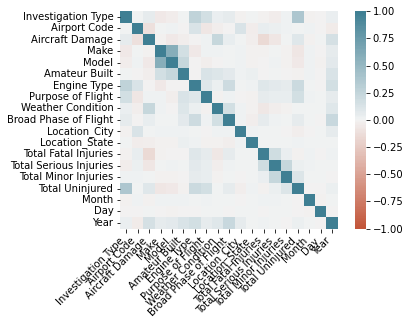

In [49]:
corr = df_transformed.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
from sklearn.preprocessing import StandardScaler
def data_scaling(dataframe,inverse=False):
    scaler=StandardScaler()
    
    if inverse == False:
        return scaler.fit_transform(dataframe)
    else:
        scaler.fit(dataframe)
        return scaler.inverse_transform(dataframe)

In [51]:
df_numerical_scaled = data_scaling()

In [20]:
df_numerical_scaled

array([[ 0.48124028, -0.18707092, -0.14973867, ...,  1.77131139,
        -0.87397776,  1.87692668],
       [ 0.08626243, -0.18707092, -0.14973867, ...,  1.77131139,
        -1.1003877 ,  1.87692668],
       [-0.1112265 , -0.18707092, -0.14973867, ...,  1.77131139,
        -1.32679763,  1.87692668],
       ...,
       [ 0.48124028, -0.18707092, -0.14973867, ...,  0.46461821,
         1.61653153, -2.3229255 ],
       [ 0.67872921, -0.18707092, -0.14973867, ...,  0.13794492,
         0.37127688, -3.61518771],
       [ 0.28375135, -0.18707092, -0.14973867, ...,  1.1179648 ,
         0.93730172, -5.12282696]])

In [54]:
df_transformed.head()

,Investigation Type,Airport Code,Aircraft Damage,Make,Model,Amateur Built,Engine Type,Purpose of Flight,Weather Condition,Broad Phase of Flight,Location_City,Location_State,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,0,3658,2,1072,805,0,2,17,0,12,7864,86,3,0,0,0,12,8,2013
1,0,8071,0,6039,6356,0,11,18,3,12,15784,86,1,0,0,0,12,6,2013
2,0,9199,3,547,1654,2,12,22,3,12,15977,2,0,0,0,0,12,4,2013
3,0,9199,3,147,8032,2,12,22,3,12,7318,183,0,0,0,0,12,3,2013
4,0,2175,2,4052,7713,1,12,17,3,12,16936,242,0,0,1,0,12,2,2013


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principal_comp = pca.fit_transform(df_transformed)
principal_comp

array([[-1500.18475616, -3462.43748121,  2979.04943989,  -199.62072222,
          -62.64594642],
       [ 6889.18350737,  3566.35045022,  -388.58203836,  2361.48643799,
          -55.27749923],
       [ 7096.02122821, -2811.25501402, -1779.8821083 ,  -944.21429988,
         -141.96594207],
       ...,
       [ 6718.35340485, -3783.20021863, -1830.52118505,   295.85549405,
          149.28611705],
       [-7276.97882127,  4321.29141609, -2835.56304706,   713.65061372,
          -90.59373388],
       [ 1438.61564371, -2291.59262681, -2206.6315278 ,  4366.73153073,
          -20.95107844]])

In [91]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3', 'pca4', 'pca5'])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5
0,-1500.184756,-3462.437481,2979.049440,-199.620722,-62.645946
1,6889.183507,3566.350450,-388.582038,2361.486438,-55.277499
2,7096.021228,-2811.255014,-1779.882108,-944.214300,-141.965942
3,-1452.491847,3089.665669,-2404.638259,-3687.871206,42.463105
4,7495.130580,3850.194575,5566.967157,-81.016203,92.181492


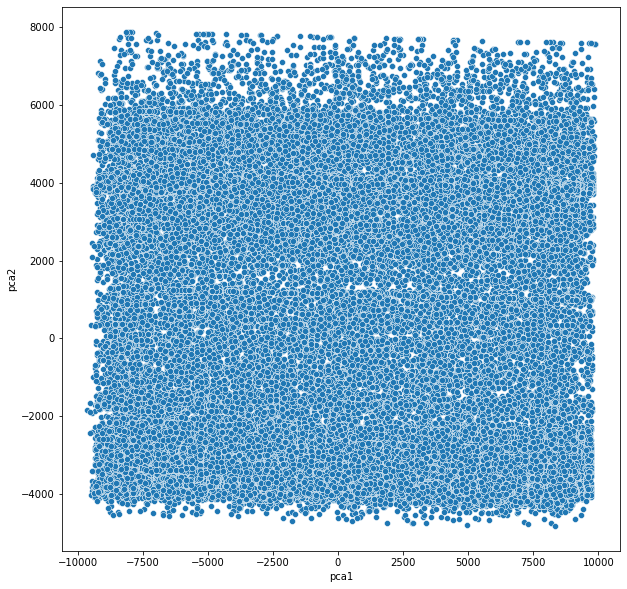

In [88]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", data = pca_df, palette =['red','green','blue'])
plt.show()

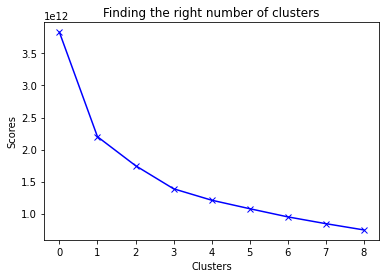

In [104]:
from sklearn.cluster import KMeans

# Obtain optimal number of clusters
scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_df)
    scores_1.append(kmeans.inertia_) 
    
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [105]:
scores_1

[3830845165582.8613,
 2200589449192.794,
 1749087434435.6035,
 1387949048877.2063,
 1210031023615.1912,
 1077272114231.8931,
 949863886330.1985,
 843733120236.8076,
 745984193580.778]

In [98]:
kmeans = KMeans(3)
labels = kmeans.fit_predict(pca_df)
u_labels = np.unique(labels)

In [100]:
kmeans.cluster_centers_

array([[ 5.46868268e+03, -1.46097642e+02,  3.00589868e+01,
        -7.18584882e-01, -7.82403761e-02,  1.00012890e+00],
       [-4.08007600e+03, -2.96662624e+03, -6.27780871e+01,
        -1.96329084e+01,  4.24104893e-01,  1.48405699e-03],
       [-3.70922002e+03,  3.76065701e+03,  2.76510817e+01,
         2.44988207e+01, -3.82338942e-01,  1.99899041e+00]])

In [102]:
kmeans.score(pca_df)

-1749085187929.146

In [97]:
pca_df['cluster'] = labels
pca_df

,pca1,pca2,pca3,pca4,pca5,cluster
0,-1500.184756,-3462.437481,2979.049440,-199.620722,-62.645946,0
1,6889.183507,3566.350450,-388.582038,2361.486438,-55.277499,1
2,7096.021228,-2811.255014,-1779.882108,-944.214300,-141.965942,1
3,-1452.491847,3089.665669,-2404.638259,-3687.871206,42.463105,2
4,7495.130580,3850.194575,5566.967157,-81.016203,92.181492,1
...,...,...,...,...,...,...
74421,-5564.812769,-2796.656563,-2940.257587,12.393188,69.762996,0
74422,-3950.882948,-2325.024307,-2713.477307,4023.735379,-92.707425,0
74423,6718.353405,-3783.200219,-1830.521185,295.855494,149.286117,1
74424,-7276.978821,4321.291416,-2835.563047,713.650614,-90.593734,2


In [85]:
for i in u_labels:
    plt.scatter(df_transformed[Cluster == i , 0] , df_transformed[Cluster == i , 1] , label = i)
plt.legend()
plt.show()

NameError: name 'Cluster' is not defined

In [29]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_numerical.columns])
cluster_centers

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,22.174483,11.480222,7.094422,0.173371,0.168255,0.150702,0.437009
1,-0.026961,-0.014587,-0.008443,0.007036,0.064293,-0.872184,0.023127
2,-0.030876,-0.015369,-0.010058,-0.007348,-0.063479,0.854853,-0.023808


In [30]:
cluster_centers = data_scaling(cluster_centers,inverse=True)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_numerical.columns])
cluster_centers

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Day,Year
0,239.467732,66.026812,26.115754,0.071905,0.072302,0.151312,0.235929
1,7.090020,3.737709,2.330368,0.058263,0.062449,-0.573966,0.150232
2,7.049038,3.733474,2.324959,0.057084,0.050340,0.650591,0.140513


In [31]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':kmeans.labels_})], axis = 1)
df_cluster.head()

,Investigation Type,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,,Month,Day,Year,cluster
0,Accident,12/08/2013,"Jacksonville, FL",United States,CRG,Jacksonville Executive Airport,Fatal(3),Substantial,CESSNA,310R,No,2,Reciprocating,Personal,3,0,0,0,IMC,NaN,Preliminary,,12,8,2013,1
1,Accident,12/06/2013,"Sebring, FL",United States,SEF,Sebring Regional Airport,Fatal(1),Destroyed,TEXAS HELICOPTER CORP,M74L,No,1,Unknown,Positioning,1,0,0,0,NaN,NaN,Preliminary,,12,6,2013,1
2,Accident,12/04/2013,"Soldotna, AK",United States,NaN,NaN,NaN,NaN,BELLANCA,7GCBC,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,,12,4,2013,1
3,Accident,12/03/2013,"Hendersonville, NC",United States,NaN,NaN,NaN,NaN,ANDERSON ANDREAS,RANS S-6S,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,,12,3,2013,1
4,Accident,12/02/2013,"Trenton, SC",United States,6J6,Edgefield County Airport,Non-Fatal,Substantial,MOFFITT OSCAR/ KIT PROSTAR A/C,PT2,Yes,1,NaN,Personal,0,0,1,0,NaN,NaN,Preliminary,,12,2,2013,1


In [32]:
pd.crosstab(index=df_cluster['cluster'],columns='count')

col_0,count
cluster,
0,97
1,36752
2,37577
